In [183]:
import pandas as pd
import networkx as nx
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [151]:
# read in data

drugs_se = pd.read_csv("data/heart_drugs_with_heart_se.csv")
drugs_target = pd.read_csv("data/heart_drugs_targets.csv")

# Drug-SE Graphs

In [157]:
# format edges

drugs_se['edge'] = [(drugs_se['drug_name'][e], drugs_se['side_effect_name'][e]) for e in range(len(drugs_se))]

In [209]:
# function to draw drug - se graph based on df with drug_name, side_effect_name, and edges

def draw_bipartite_graph(df, title=""):
    G = nx.Graph()
    
    # add bipartite nodes
    drugs = df[list(df)[0]].unique()
    se = df[list(df)[1]].unique()
    edges = df['edge']
    
    G.add_nodes_from(drugs, bipartite=0)
    G.add_nodes_from(se, bipartite=1)
    
    # add edges
    G.add_edges_from(edges)
    
    # create color_dict
    color_dict = {}
    for d in range(len(drugs)):
        color_dict[drugs[d]] = sns.color_palette("hls", len(drugs))[d]
    
    # set colors
    edge_colors = []
    for pair in G.edges:
        edge_colors.append(color_dict[pair[0]])
    
#     # sanity check
#     assert nx.is_connected(G)
    
    # plot graph
    bottom_nodes, top_nodes = drugs, se
    
    top = bottom_nodes
    pos = nx.bipartite_layout(G, top)
    
    plt.figure(figsize=(10, 10)) 
    plt.title(title)
    nx.draw(G, pos=pos, with_labels=True, edge_color=edge_colors)
    return G

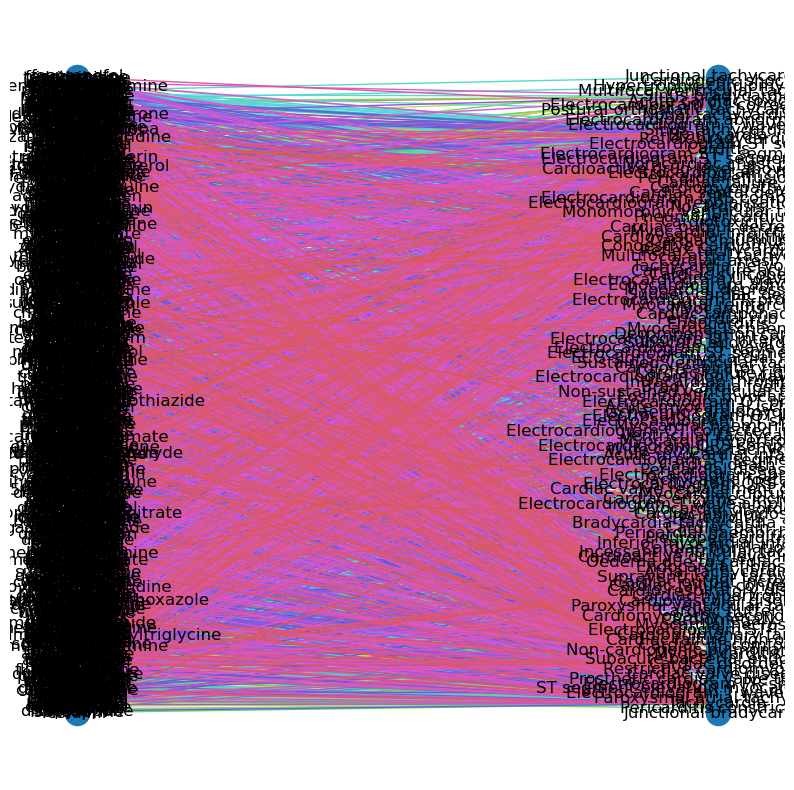

In [210]:
draw_bipartite_graph(drugs_se)

## Trying again but with a smaller number of ADEs

In [211]:
# 10 most common heart side effects

Counter(drugs_se.side_effect_name).most_common(10)

[('Tachycardia', 577),
 ('Cardiac disorder', 411),
 ('Bradycardia', 356),
 ('Myocardial infarction', 321),
 ('Cardiac arrest', 230),
 ('Cardiac failure', 216),
 ('Cardiac failure congestive', 197),
 ('Ventricular tachycardia', 141),
 ('Cardiovascular disorder', 120),
 ('Myocardial ischaemia', 117)]

In [212]:
# most common keys
top_ten_common_se = [k[0] for k in Counter(drugs_se.side_effect_name).most_common(10)]

top_ten_common_drugs_se = drugs_se[drugs_se['side_effect_name'].isin(top_ten_common_se)]

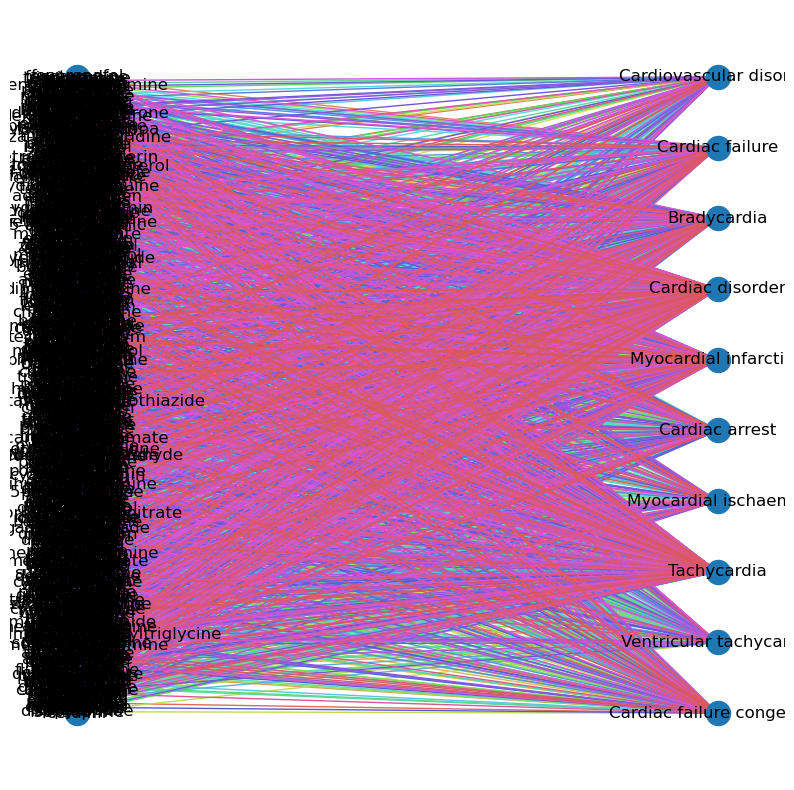

In [213]:
draw_bipartite_graph(top_ten_common_drugs_se)

## Trying again but with a smaller number of ADEs and smaller number of drugs

In [214]:
# 20 drugs with most heart side effects

Counter(drugs_se.drug_name).most_common(20)

[('tacrolimus', 24),
 ('aripiprazole', 24),
 ('pregabalin', 23),
 ('cyclophosphamide', 22),
 ('risperidone', 21),
 ('bortezomib', 21),
 ('doxorubicin', 20),
 ('ifosfamide', 19),
 ('mycophenolate', 18),
 ('anthracycline', 17),
 ('memantine', 17),
 ('propafenone', 17),
 ('citalopram', 16),
 ('dasatinib', 16),
 ('clomipramine', 15),
 ('ioversol', 15),
 ('quetiapine', 15),
 ('dipyridamole', 14),
 ('fluvoxamine', 14),
 ('iopamidol', 14)]

In [215]:
# most common keys

top_ten_drugs = [k[0] for k in Counter(drugs_se.drug_name).most_common(10)]

top_ten_drugs_top_ten_se = top_ten_common_drugs_se[top_ten_common_drugs_se['drug_name'].isin(top_ten_drugs)]

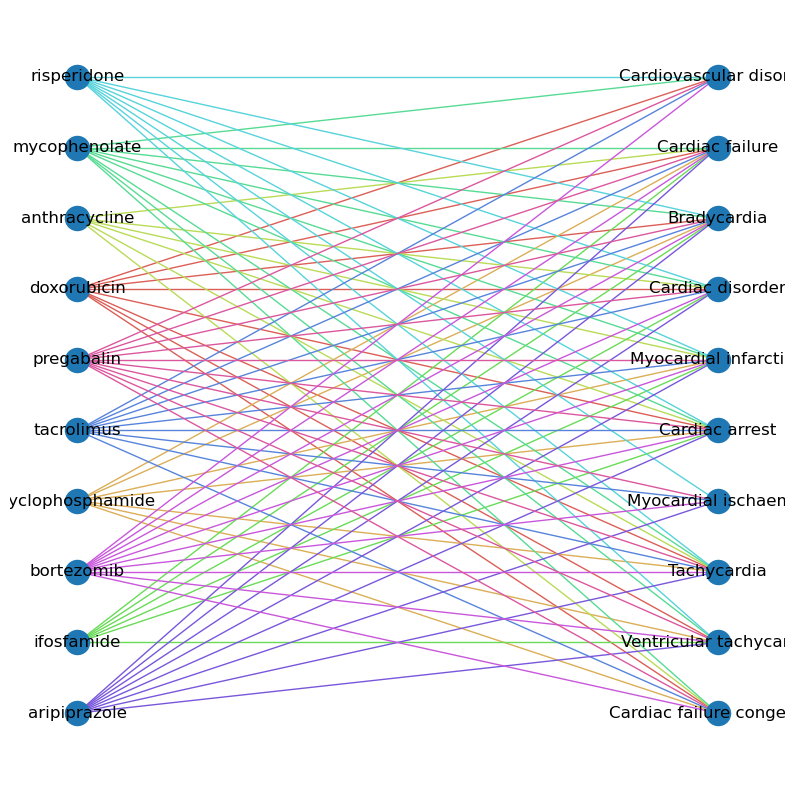

In [216]:
top_10 = draw_bipartite_graph(top_ten_drugs_top_ten_se)

In [217]:
# function to label with node degree

def label_node_deg(G, title=""):
    for node in G.nodes():
        d = G.degree(node)
        mapping = {node: node + ' \n ' + str(d)}
        G = nx.relabel_nodes(G, mapping)
    
    drugs = list(nx.bipartite.sets(G)[0])
        
    # create color_dict
    color_dict = {}
    for d in range(len(drugs)):
        color_dict[drugs[d]] = sns.color_palette("hls", len(drugs))[d]
    
    # set colors
    edge_colors = []
    for pair in G.edges:
        edge_colors.append(color_dict[pair[0]])
        
    # plot graph
    bottom_nodes, top_nodes = nx.bipartite.sets(G)
    
    top = nx.bipartite.sets(G)[0]
    pos = nx.bipartite_layout(G, top)
    
    plt.figure(figsize=(10, 10)) 
    plt.title(title)    
    nx.draw(G, pos=pos, with_labels=True, edge_color=edge_colors, font_size=9)
    return G
    
    

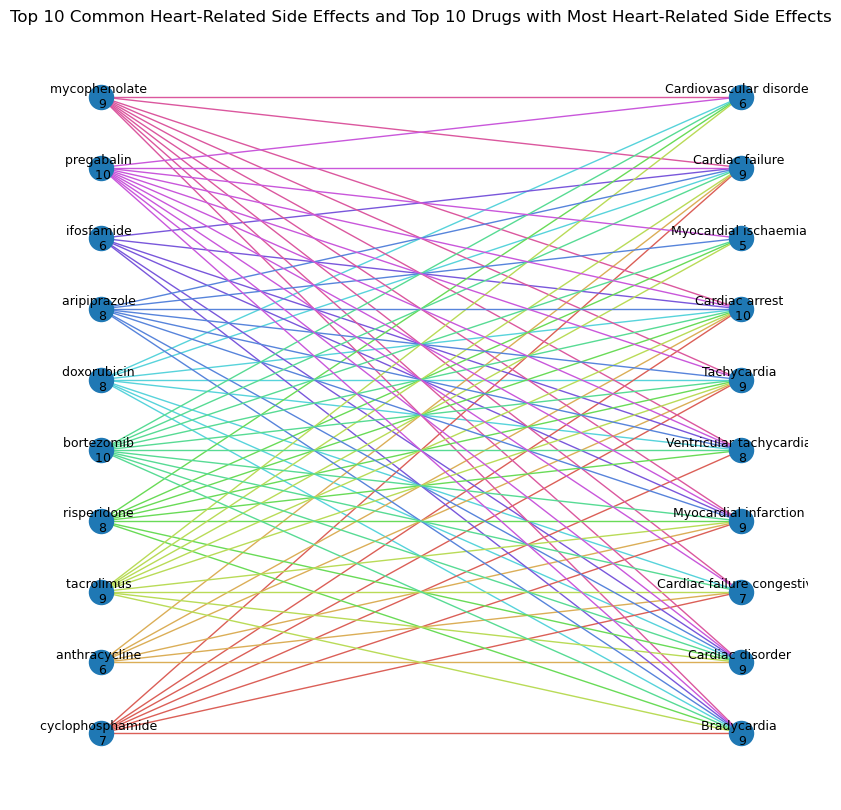

In [218]:
label_node_deg(top_10, "Top 10 Common Heart-Related Side Effects and Top 10 Drugs with Most Heart-Related Side Effects")


# TODO : project graph to drug - drug and se - se

# Drug - Drug Graphs

In [220]:
# create drug - target network first then project into a drug - drug network

dt = drugs_target[['drug_name', 'target_name']]

dt['edge'] = [(dt['drug_name'][e], dt['target_name'][e]) for e in range(len(dt))]

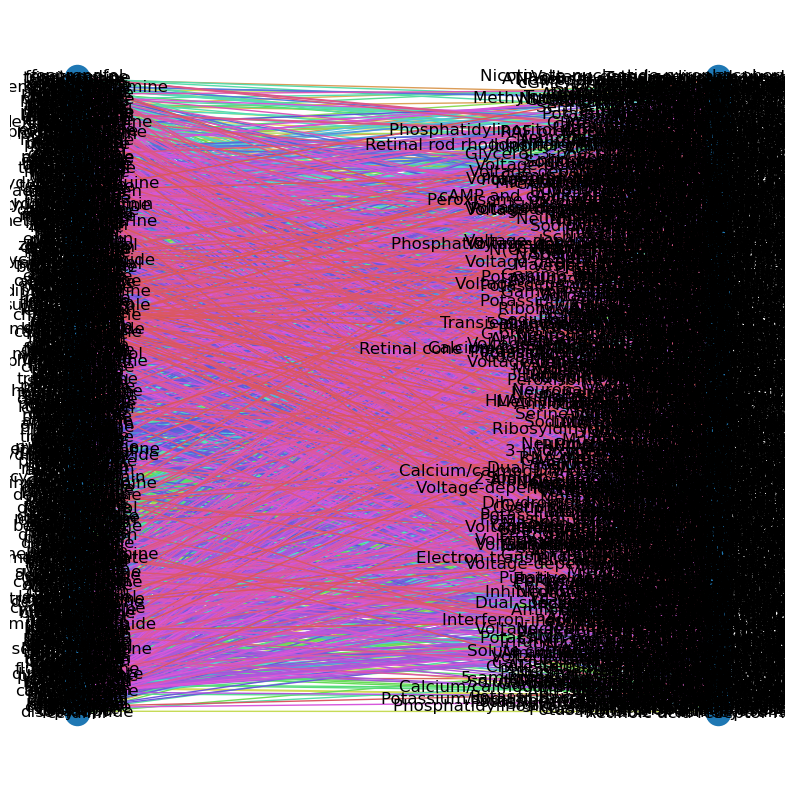

In [221]:
draw_bipartite_graph(dt)

## Trying again but with a smaller number of drugs (10)

In [225]:
# top 10 drugs with the most se

top_ten_drugs

['tacrolimus',
 'aripiprazole',
 'pregabalin',
 'cyclophosphamide',
 'risperidone',
 'bortezomib',
 'doxorubicin',
 'ifosfamide',
 'mycophenolate',
 'anthracycline']

In [227]:
top_10_drugs_dt = dt[dt['drug_name'].isin(top_ten_drugs)]

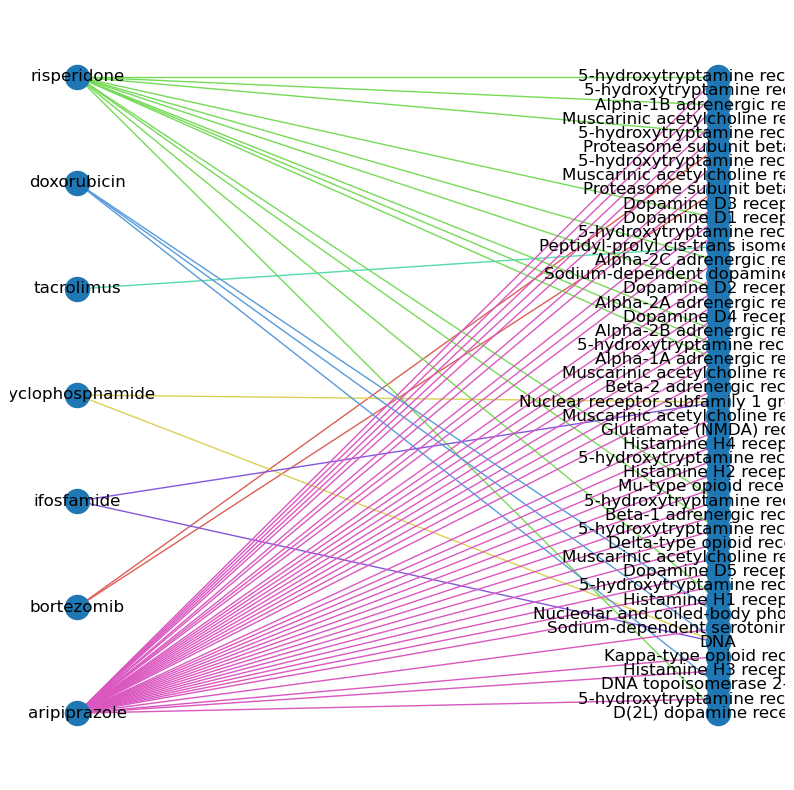

In [229]:
top_10_dt = draw_bipartite_graph(top_10_drugs_dt)

In [271]:
# function to project drug - target network to drug - drug network

def project_drug_target(G, drugs):
    projected = nx.bipartite.weighted_projected_graph(G, drugs)
    
    pos=nx.nx_agraph.graphviz_layout(projected)
    
    # draw projected drug-drug graphs
    nx.draw(projected, with_labels=True, pos=pos, font_size=9)

    # add weights between drugs
    labels = nx.get_edge_attributes(projected, 'weight')
    nx.draw_networkx_edge_labels(projected, pos=pos, edge_labels=labels, font_size=6);
    
    return projected

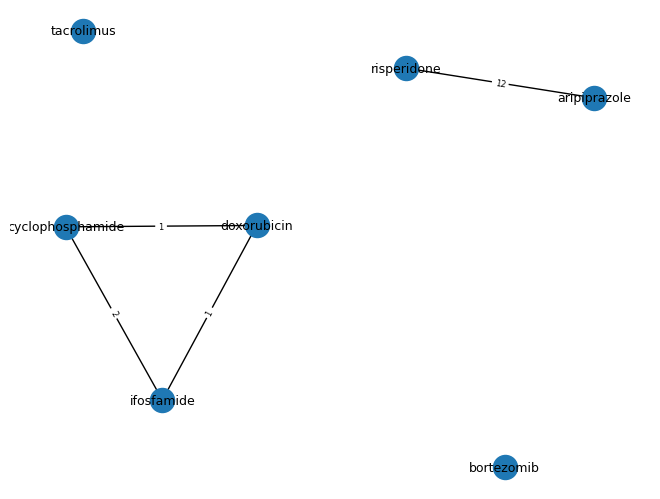

In [272]:
project_drug_target(top_10_dt, top_10_drugs_dt.drug_name.unique())

## Trying again but with a slightly larger number of drugs (20)

In [273]:
# top 20 drugs with the most se

top_twenty_drugs = [k[0] for k in Counter(drugs_se.drug_name).most_common(20)]
top_20_drugs_dt = dt[dt['drug_name'].isin(top_twenty_drugs)]

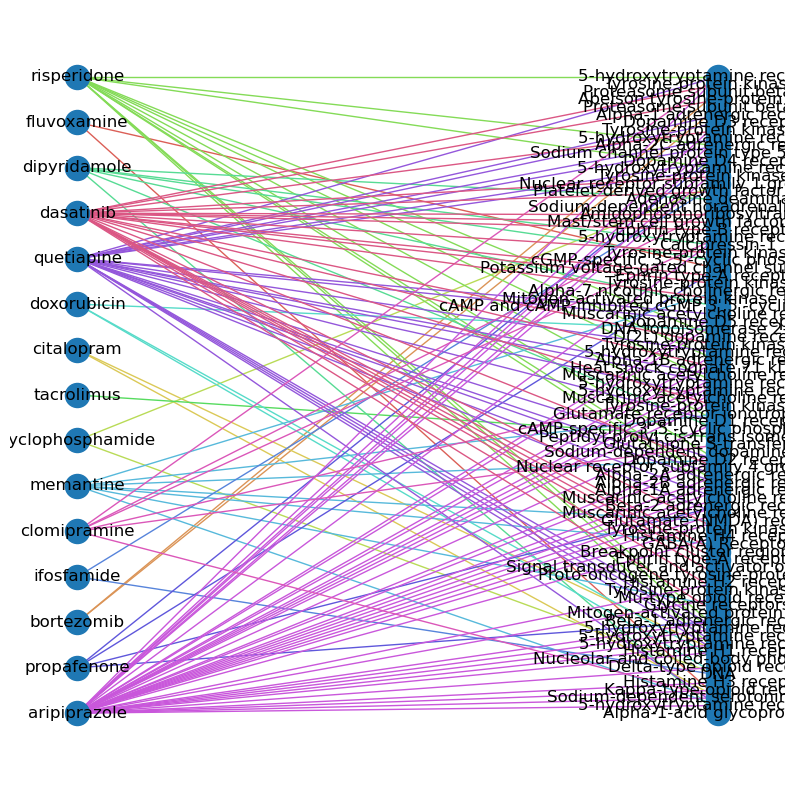

In [274]:
top_20_dt = draw_bipartite_graph(top_20_drugs_dt)

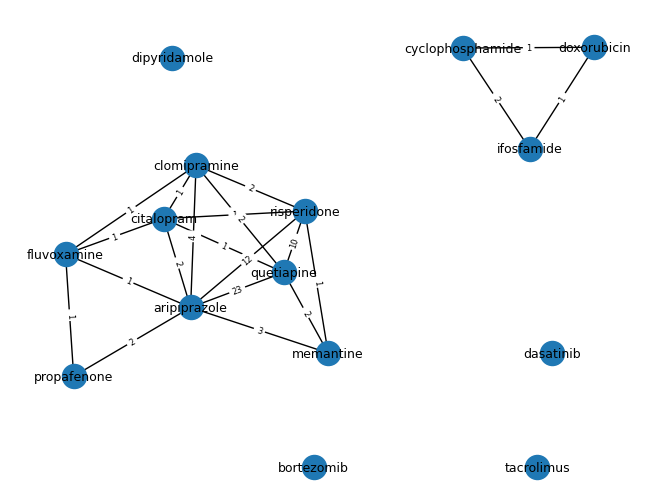

In [275]:
project_drug_target(top_20_dt, top_20_drugs_dt.drug_name.unique())

# TODO: label by color what year drugs were approved

# TODO: change weights to type of moderation not just target name